Dataset link: https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction

# 1 Data Introduction

## 1.1 Learning data

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('data.csv')
data.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
data.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [5]:
[print(col) for col in data if data[col].isna().sum() > 0]

[]

It is important to computationally check Nan presence to avoid errors and time wasted in the following steps of the project. We find that there are no Nan presence.

In [6]:
data.duplicated().sum()

0

By checking the duplicate observations, we find that there is no duplicates. 

In [7]:
print(data['Bankrupt?'].value_counts())
print('-'* 30)
print('Bankruptcy: ', round(data['Bankrupt?'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Non-bankruptcy: ', round(data['Bankrupt?'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

# The classes are heavily skewed

0    6599
1     220
Name: Bankrupt?, dtype: int64
------------------------------
Bankruptcy:  96.77 % of the dataset
Non-bankruptcy:  3.23 % of the dataset


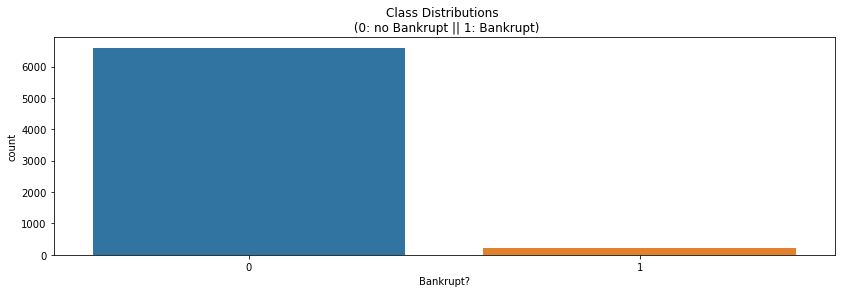

In [8]:
sentiment = data['Bankrupt?']
f, axes = plt.subplots(1,1, figsize=(14,4), sharex=False)
sns.countplot(x='Bankrupt?', data=data,order=sentiment.value_counts().index)
axes.set_title("Class Distributions \n (0: no Bankrupt || 1: Bankrupt)")
axes.set_ylabel("count")
axes.set_xlabel('Bankrupt?')
fig = plt.gcf()
fig.savefig('Bankrupt.png')
plt.show()

from countplot above, we find that the ratio of 0 and 1 severely unbalance. We should implement some works to make it more balance in data proprecessing part.

## 1.2 Feature Selection

the data set has 95 features which is too much, we first drop some of them according to their variance. We set threshold at 5 so that we can remove most useless features.

In [9]:
data_mean = np.mean(data.drop(columns = 'Bankrupt?', axis=0))

variance = np.var(data/data_mean, axis=0)
var_df = pd.DataFrame(variance,columns=['variance'])
var_df.sort_values(by='variance',ascending = False).style.background_gradient(sns.light_palette('green', as_cmap=True))

In [10]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(5.0).fit(data/data_mean)
vt_transform = vt.transform(data/data_mean)

high_var_cols = data.columns[vt.get_support()]
low_var_cols = data.columns[~vt.get_support()]

print("Removed cols :",len(low_var_cols))
print("Remaining cols :",len(high_var_cols))

Removed cols : 75
Remaining cols : 21


In [11]:
features = var_df[var_df['variance']>5].index
features

Index([' Accounts Receivable Turnover', ' Allocation rate per person',
       ' Average Collection Days', ' Cash/Current Liability',
       ' Current Asset Turnover Rate', ' Current Ratio',
       ' Fixed Assets Turnover Frequency', ' Fixed Assets to Assets',
       ' Interest-bearing debt interest rate', ' Inventory/Current Liability',
       ' Liability-Assets Flag', ' Long-term Liability to Current Assets',
       ' Long-term fund suitability ratio (A)', ' Net Value Growth Rate',
       ' Quick Assets/Current Liability', ' Quick Ratio',
       ' Revenue Per Share (Yuan ¥)', ' Revenue per person',
       ' Total assets to GNP price', ' Total debt/Total net worth',
       ' Total income/Total expense'],
      dtype='object')

The remaining columns containing varibles "Bankrupt?" with 21 independent variables.

In [12]:
X = data.loc[:,features]  
X

Accounts Receivable Turnover   Allocation rate per person  \
0                          0.001814                     0.037135   
1                          0.001286                     0.012335   
2                          0.001495                     0.141016   
3                          0.001966                     0.021320   
4                          0.001449                     0.023988   
...                             ...                          ...   
6814                       0.000690                     0.006312   
6815                       0.000655                     0.003401   
6816                       0.001510                     0.002774   
6817                       0.000716                     0.007489   
6818                       0.000325                     0.000963   

       Average Collection Days   Cash/Current Liability  \
0                     0.003487             1.473360e-04   
1                     0.004917             1.383910e-03   
2                     0.004227             5.340000e+09   
3                     0.003215             1.010646e-03   
4                     0.004367             6.804636e-04   
...                        ...                      ...   
6814                  0.009177             5.071548e-03   
6815                  0.009652             4.727181e-03   
6816                  0.004188             8.821248e-02   
6817                  0.008829             7.133218e-03   
6818                  0.019474             6.667354e-02   

       Current Asset Turnover Rate   Current Ratio  \
0                     7.010000e+08        0.002259   
1                     1.065198e-04        0.006016   
2                     1.791094e-03        0.011543   
3                     8.140000e+09        0.004194   
4                     6.680000e+09        0.006022   
...                            ...             ...   
6814                  2.294154e-04        0.010451   
6815                  1.517299e-04        0.009259   
6816                  1.762272e-04        0.038424   
6817                  2.135940e-04        0.012782   
6818                  7.863781e-03        0.051348   

       Fixed Assets Turnover Frequency   Fixed Assets to Assets  \
0                         1.165007e-04                 0.424206   
1                         7.190000e+08                 0.468828   
2                         2.650000e+09                 0.276179   
3                         9.150000e+09                 0.559144   
4                         2.935211e-04                 0.309555   
...                                ...                      ...   
6814                      1.429781e-04                 0.400338   
6815                      6.051982e-04                 0.096136   
6816                      1.024298e-03                 0.055509   
6817                      2.330013e-04                 0.246805   
6818                      2.995731e-04                 0.005016   

       Interest-bearing debt interest rate   Inventory/Current Liability  ...  \
0                             7.250725e-04                      0.001036  ...   
1                             6.470647e-04                      0.005210  ...   
2                             7.900790e-04                      0.013879  ...   
3                             4.490449e-04                      0.003540  ...   
4                             6.860686e-04                      0.004869  ...   
...                                    ...                           ...  ...   
6814                          1.790179e-04                      0.013212  ...   
6815                          2.370237e-04                      0.006730  ...   
6816                          0.000000e+00                      0.007810  ...   
6817                          2.110211e-04                      0.013334  ...   
6818                          5.900000e+08                      0.000000  ...   

       Long-term Liability to Current Assets  \
0     

## 1.3 Correlation check for features

we draw correlation matrix and heatmap to check whether severe correlation exists.

In [13]:
cor = X.corr()
cor.style.background_gradient(sns.light_palette('blue', as_cmap=True))

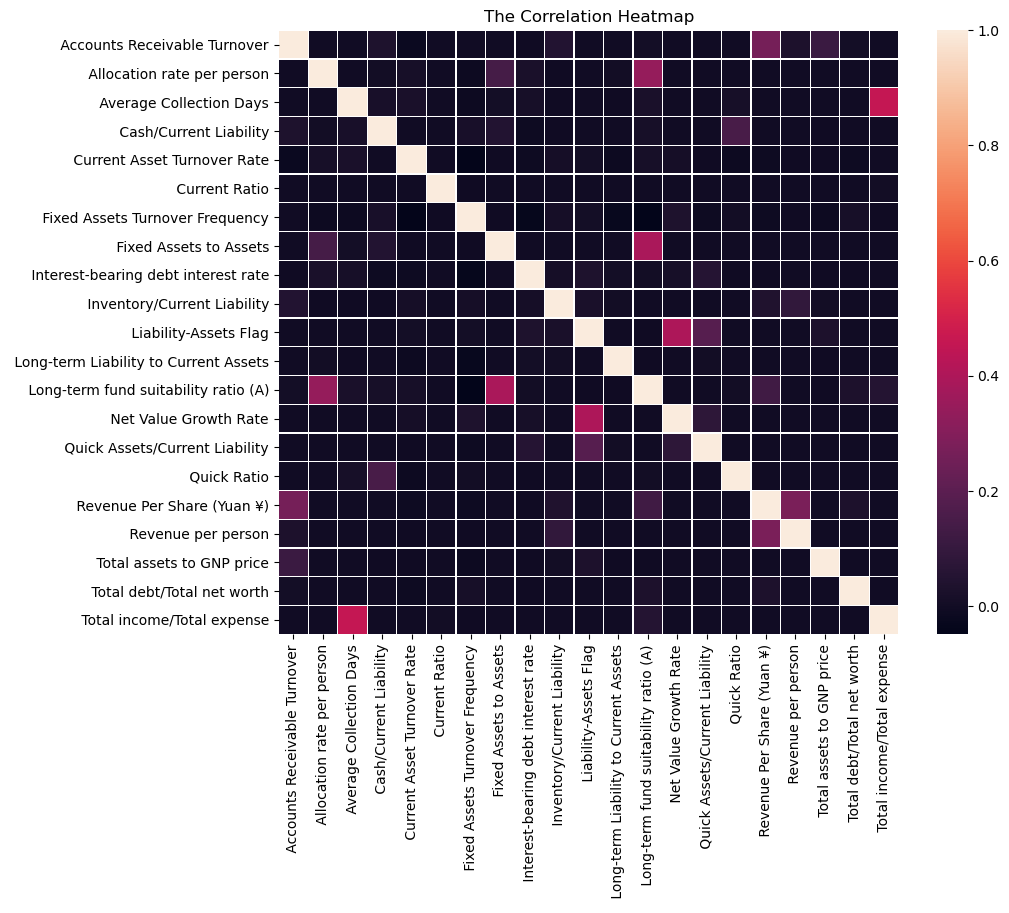

In [14]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(cor,linewidths=0.2)
plt.title('The Correlation Heatmap')

plt.show()

conclude from graph above, there is no severe correlation exists,so we keep all the 21 features

# 2 Data Visualization

## 2.1 Feature Distribution

we randomly choose four features to draw distribution plots based on whether bankrupt or not to have a clear look.

In [15]:
newdata = X.copy()
newdata['Bankrupt?'] = data['Bankrupt?']

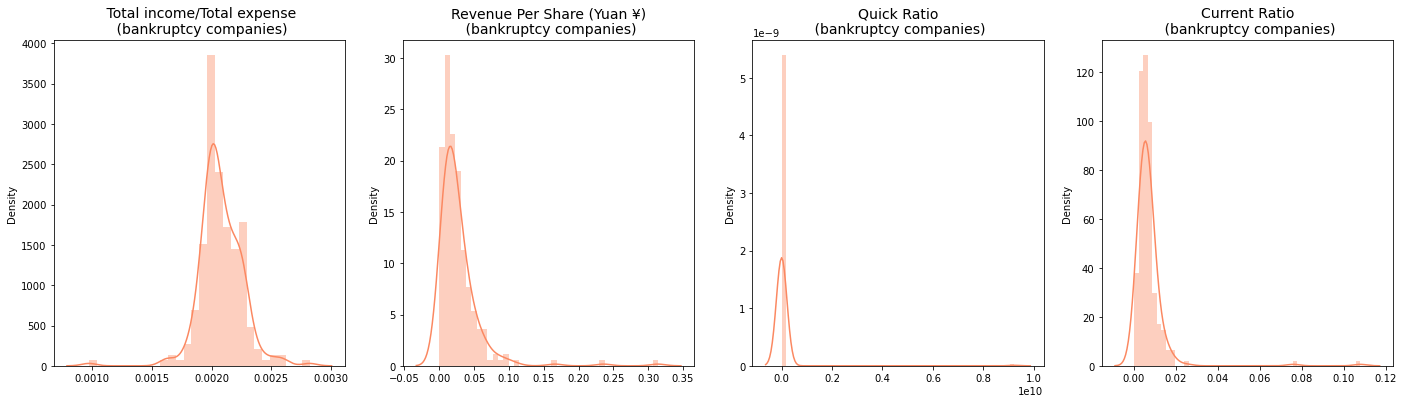

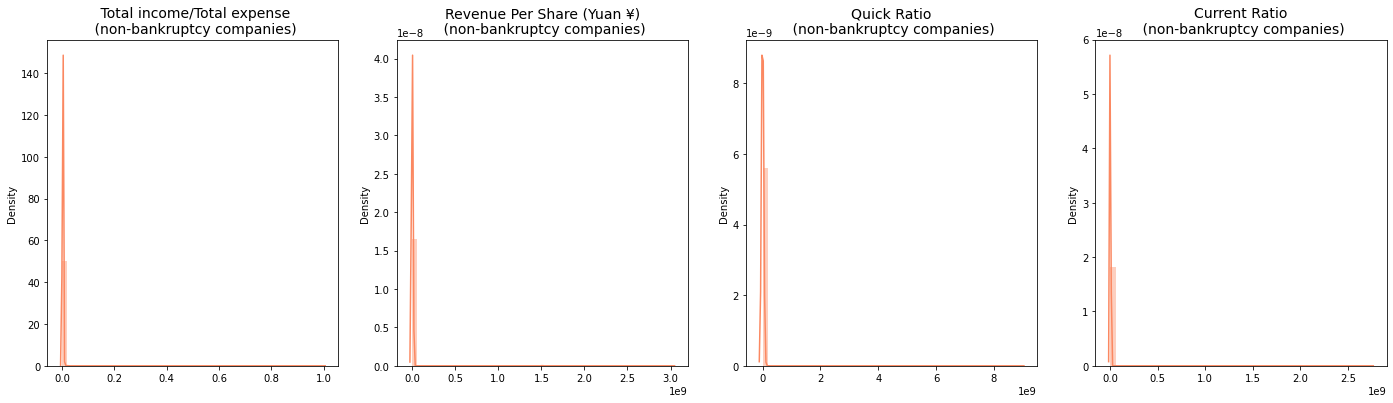

In [16]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))
Current_Ratio = newdata[' Total income/Total expense'].loc[newdata['Bankrupt?'] == 1].values
sns.distplot(Current_Ratio,ax=ax1, color='#FB8861')
ax1.set_title(' Total income/Total expense\n (bankruptcy companies)', fontsize=14)

Fixed_Assets_to_Assets = newdata[' Revenue Per Share (Yuan ¥)'].loc[newdata['Bankrupt?'] == 1].values
sns.distplot(Fixed_Assets_to_Assets,ax=ax2, color='#FB8861')
ax2.set_title('Revenue Per Share (Yuan ¥)\n (bankruptcy companies)', fontsize=14)

Net_Value_Growth_Rate = newdata[' Quick Ratio'].loc[newdata['Bankrupt?'] == 1].values
sns.distplot(Net_Value_Growth_Rate,ax=ax3, color='#FB8861')
ax3.set_title('Quick Ratio\n (bankruptcy companies)', fontsize=14)

Revenue_per_person = newdata[' Current Ratio'].loc[newdata['Bankrupt?'] == 1].values
sns.distplot(Revenue_per_person,ax=ax4, color='#FB8861')
ax4.set_title('Current Ratio\n (bankruptcy companies)', fontsize=14)
plt.show()

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))
Current_Ratio = newdata[' Total income/Total expense'].loc[newdata['Bankrupt?'] == 0].values
sns.distplot(Current_Ratio,ax=ax1, color='#FB8861')
ax1.set_title(' Total income/Total expense\n (non-bankruptcy companies)', fontsize=14)

Fixed_Assets_to_Assets = newdata[' Revenue Per Share (Yuan ¥)'].loc[newdata['Bankrupt?'] == 0].values
sns.distplot(Fixed_Assets_to_Assets,ax=ax2, color='#FB8861')
ax2.set_title('Revenue Per Share (Yuan ¥)\n (non-bankruptcy companies)', fontsize=14)

Net_Value_Growth_Rate = newdata[' Quick Ratio'].loc[newdata['Bankrupt?'] == 0].values
sns.distplot(Net_Value_Growth_Rate,ax=ax3,color='#FB8861')
ax3.set_title('Quick Ratio\n (non-bankruptcy companies)', fontsize=14)

Revenue_per_person = newdata[' Current Ratio'].loc[newdata['Bankrupt?'] == 0].values
sns.distplot(Revenue_per_person,ax=ax4,color='#FB8861')
ax4.set_title('Current Ratio\n (non-bankruptcy companies)', fontsize=14)
plt.show()


we can see from distribution graphs above, the distribution of features are signifantly different between bankrupt companies and non-bankrupt companies.

# 3 Data Preprocessing 

## 3.1 Oversampling

In [17]:
y = data['Bankrupt?']
X = data[features]

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
counter = Counter(y_smote)
print(counter)

Counter({1: 6599, 0: 6599})


In [18]:
newdata = pd.concat([y_smote,X_smote],axis = 1)
newdata

Bankrupt?   Accounts Receivable Turnover   Allocation rate per person  \
0              1                       0.001814                     0.037135   
1              1                       0.001286                     0.012335   
2              1                       0.001495                     0.141016   
3              1                       0.001966                     0.021320   
4              1                       0.001449                     0.023988   
...          ...                            ...                          ...   
13193          1                       0.000713                     0.063394   
13194          1                       0.000937                     0.007199   
13195          1                       0.003197                     0.120148   
13196          1                       0.002338                     0.016882   
13197          1                       0.002987                     0.054173   

        Average Collection Days   Cash/Current Liability  \
0                      0.003487             1.473360e-04   
1                      0.004917             1.383910e-03   
2                      0.004227             5.340000e+09   
3                      0.003215             1.010646e-03   
4                      0.004367             6.804636e-04   
...                         ...                      ...   
13193                  0.009635             8.584022e+09   
13194                  0.008380             3.541255e-03   
13195                  0.002456             6.465663e-04   
13196                  0.005955             4.326580e-03   
13197                  0.002613             6.468533e-04   

        Current Asset Turnover Rate   Current Ratio  \
0                      7.010000e+08        0.002259   
1                      1.065198e-04        0.006016   
2                      1.791094e-03        0.011543   
3                      8.140000e+09        0.004194   
4                      6.680000e+09        0.006022   
...                             ...             ...   
13193                  1.571216e-03        0.004894   
13194                  1.597071e-04        0.008235   
13195                  6.829330e+07        0.002483   
13196                  1.539865e-04        0.006822   
13197                  5.458900e+09        0.002332   

        Fixed Assets Turnover Frequency   Fixed Assets to Assets  \
0                          1.165007e-04                 0.424206   
1                          7.190000e+08                 0.468828   
2                          2.650000e+09                 0.276179   
3                          9.150000e+09                 0.559144   
4                          2.935211e-04                 0.309555   
...                                 ...                      ...   
13193                      6.459737e+09                 0.102463   
13194                      2.328379e-04                 0.247357   
13195                      2.343868e+09                 0.575453   
13196                      3.861365e-04                 0.226082   
13197                      8.068815e+09                 0.713790   

        Interest-bearing debt interest rate  ...  \
0                                  0.000725  ...   
1                                  0.000647  ...   
2                                  0.000790  ...   
3                                  0.000449  ...   
4                                  0.000686  ...   
...                                     ...  ...   
13193                              0.000785  ...   
13194                              0.000421  ...   
13195                              0.000318  ...   
13196                              0.000418  ...   
13197                              0.000605  ...   

        Long-term Liability to Current Assets  \
0                                    0.025592   
1                                    0.023947   
2                                    0.003715   
3                         

## 3.2 Boxplot

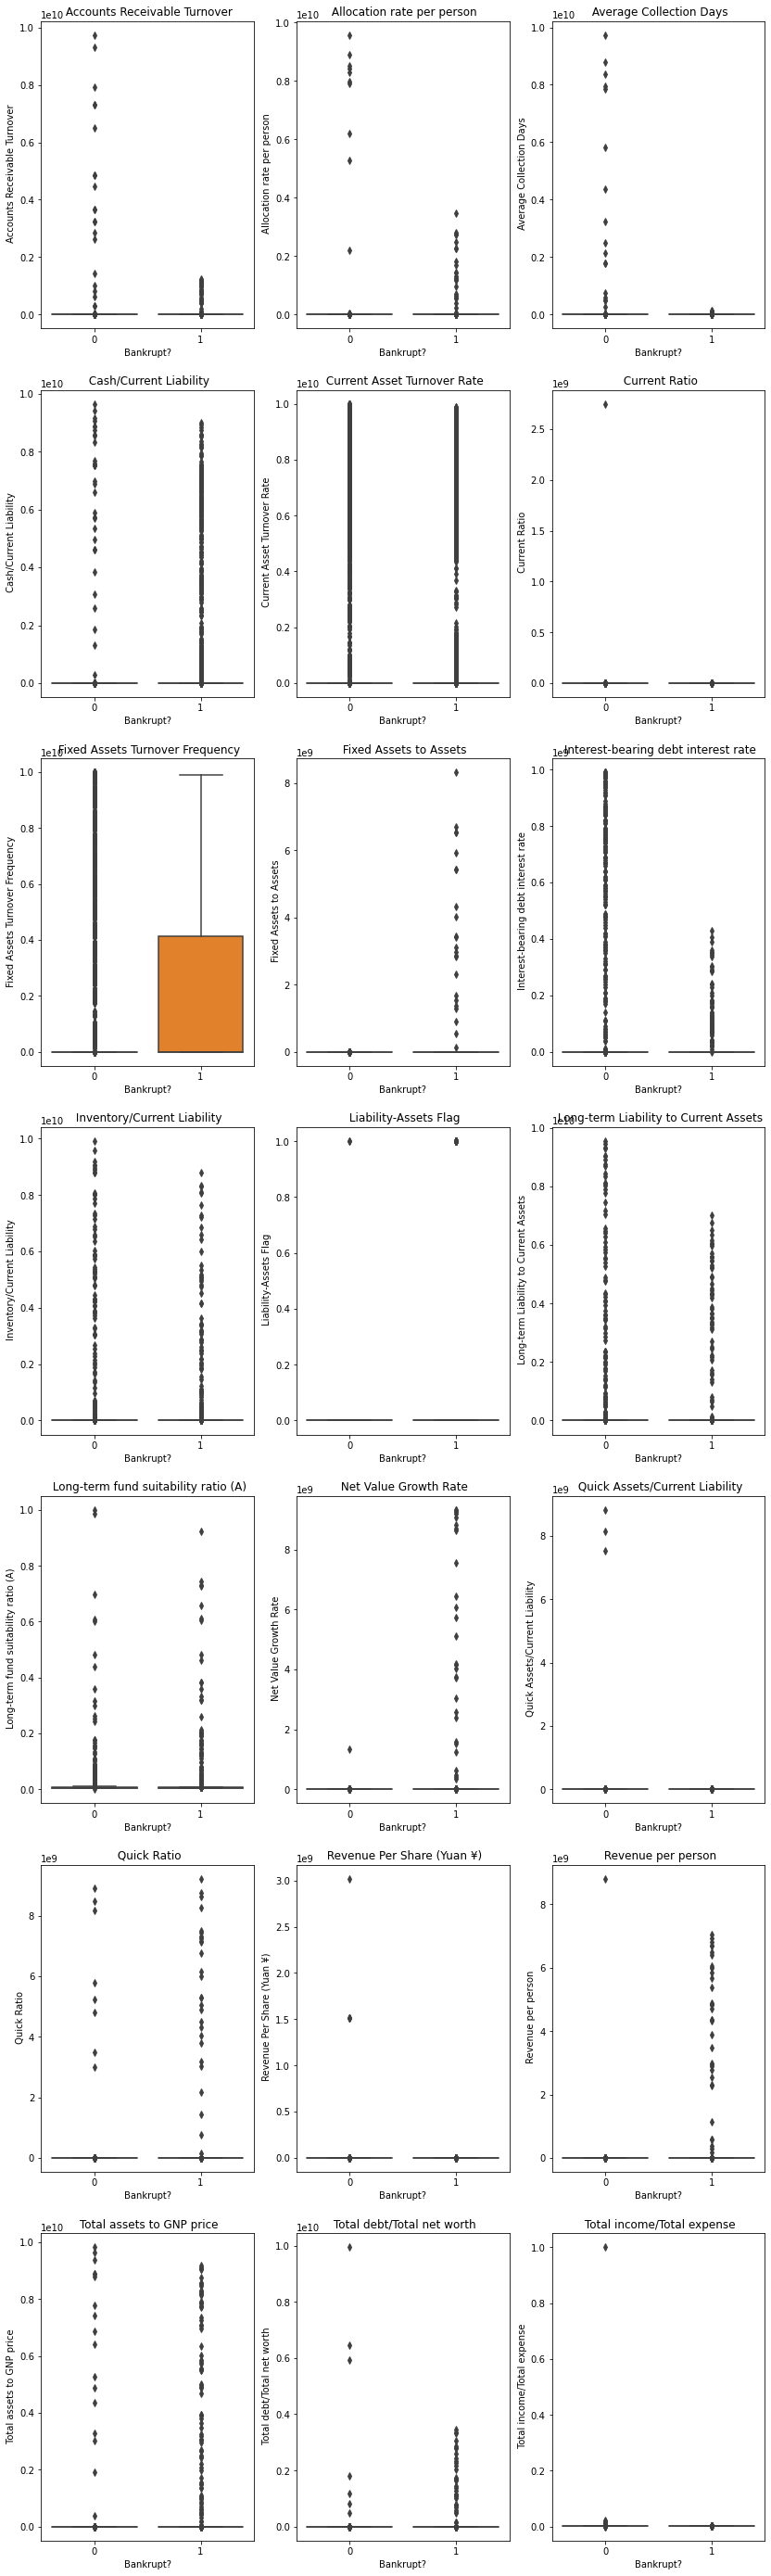

In [19]:
fig = plt.figure(figsize=(14,50))
location = 1

for i in features:
    fig.add_subplot(7,3,location)
    sns.boxplot(y=i,x='Bankrupt?',data=newdata)
    plt.title(i)
    location += 1

plt.show()

## 3.2 Outlier Removel

According to the boxplot above, we choose some features to do outlier removal.

In [20]:
def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 5), np.percentile(feature, 95)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

new_df = outliers_removal(newdata[' Interest-bearing debt interest rate'],' Interest-bearing debt interest rate', newdata)
new_df = outliers_removal(new_df[' Long-term fund suitability ratio (A)'],' Long-term fund suitability ratio (A)', new_df)
new_df = outliers_removal(new_df[' Accounts Receivable Turnover'],' Accounts Receivable Turnover', new_df)
new_df = outliers_removal(new_df[' Fixed Assets Turnover Frequency'],' Fixed Assets Turnover Frequency', new_df)
new_df = outliers_removal(new_df[' Allocation rate per person'],' Allocation rate per person', new_df)
new_df = outliers_removal(new_df[' Cash/Current Liability'],' Cash/Current Liability', new_df)
new_df = outliers_removal(new_df[' Inventory/Current Liability'],' Inventory/Current Liability', new_df)
new_df = outliers_removal(new_df[' Long-term Liability to Current Assets'],' Long-term Liability to Current Assets', new_df)
new_df = outliers_removal(new_df[' Current Asset Turnover Rate'],' Current Asset Turnover Rate', new_df)
new_df = outliers_removal(new_df[' Fixed Assets to Assets'],' Fixed Assets to Assets', new_df)
new_df = outliers_removal(new_df[' Total assets to GNP price'],' Total assets to GNP price', new_df)

Quartile 25: 0.0 | Quartile 75: 0.0008820541428391875
iqr: 0.0008820541428391875
Cut Off: 0.0013230812142587811
 Interest-bearing debt interest rate Lower: -0.0013230812142587811
 Interest-bearing debt interest rate Upper: 0.002205135357097969
 Interest-bearing debt interest rate outliers for close to bankruptcy cases: 355
-----------------------------------------------------------------
Quartile 25: 0.004942785819246056 | Quartile 75: 0.01288298052389556
iqr: 0.007940194704649503
Cut Off: 0.011910292056974255
 Long-term fund suitability ratio (A) Lower: -0.006967506237728198
 Long-term fund suitability ratio (A) Upper: 0.024793272580869816
 Long-term fund suitability ratio (A) outliers for close to bankruptcy cases: 243
-----------------------------------------------------------------
Quartile 25: 0.00044061936868909033 | Quartile 75: 0.0036188701037940356
iqr: 0.0031782507351049453
Cut Off: 0.0047673761026574175
 Accounts Receivable Turnover Lower: -0.004326756733968327
 Accounts Rec

In [21]:
print(new_df['Bankrupt?'].value_counts())
print('-'* 30)
print('Financially stable: ', round(new_df['Bankrupt?'].value_counts()[0]/len(new_df) * 100,2), '% of the dataset')
print('Financially unstable: ', round(new_df['Bankrupt?'].value_counts()[1]/len(new_df) * 100,2), '% of the dataset')

# The classes are heavily skewed

0    5656
1    5502
Name: Bankrupt?, dtype: int64
------------------------------
Financially stable:  50.69 % of the dataset
Financially unstable:  49.31 % of the dataset


boxplot after removing outliers.

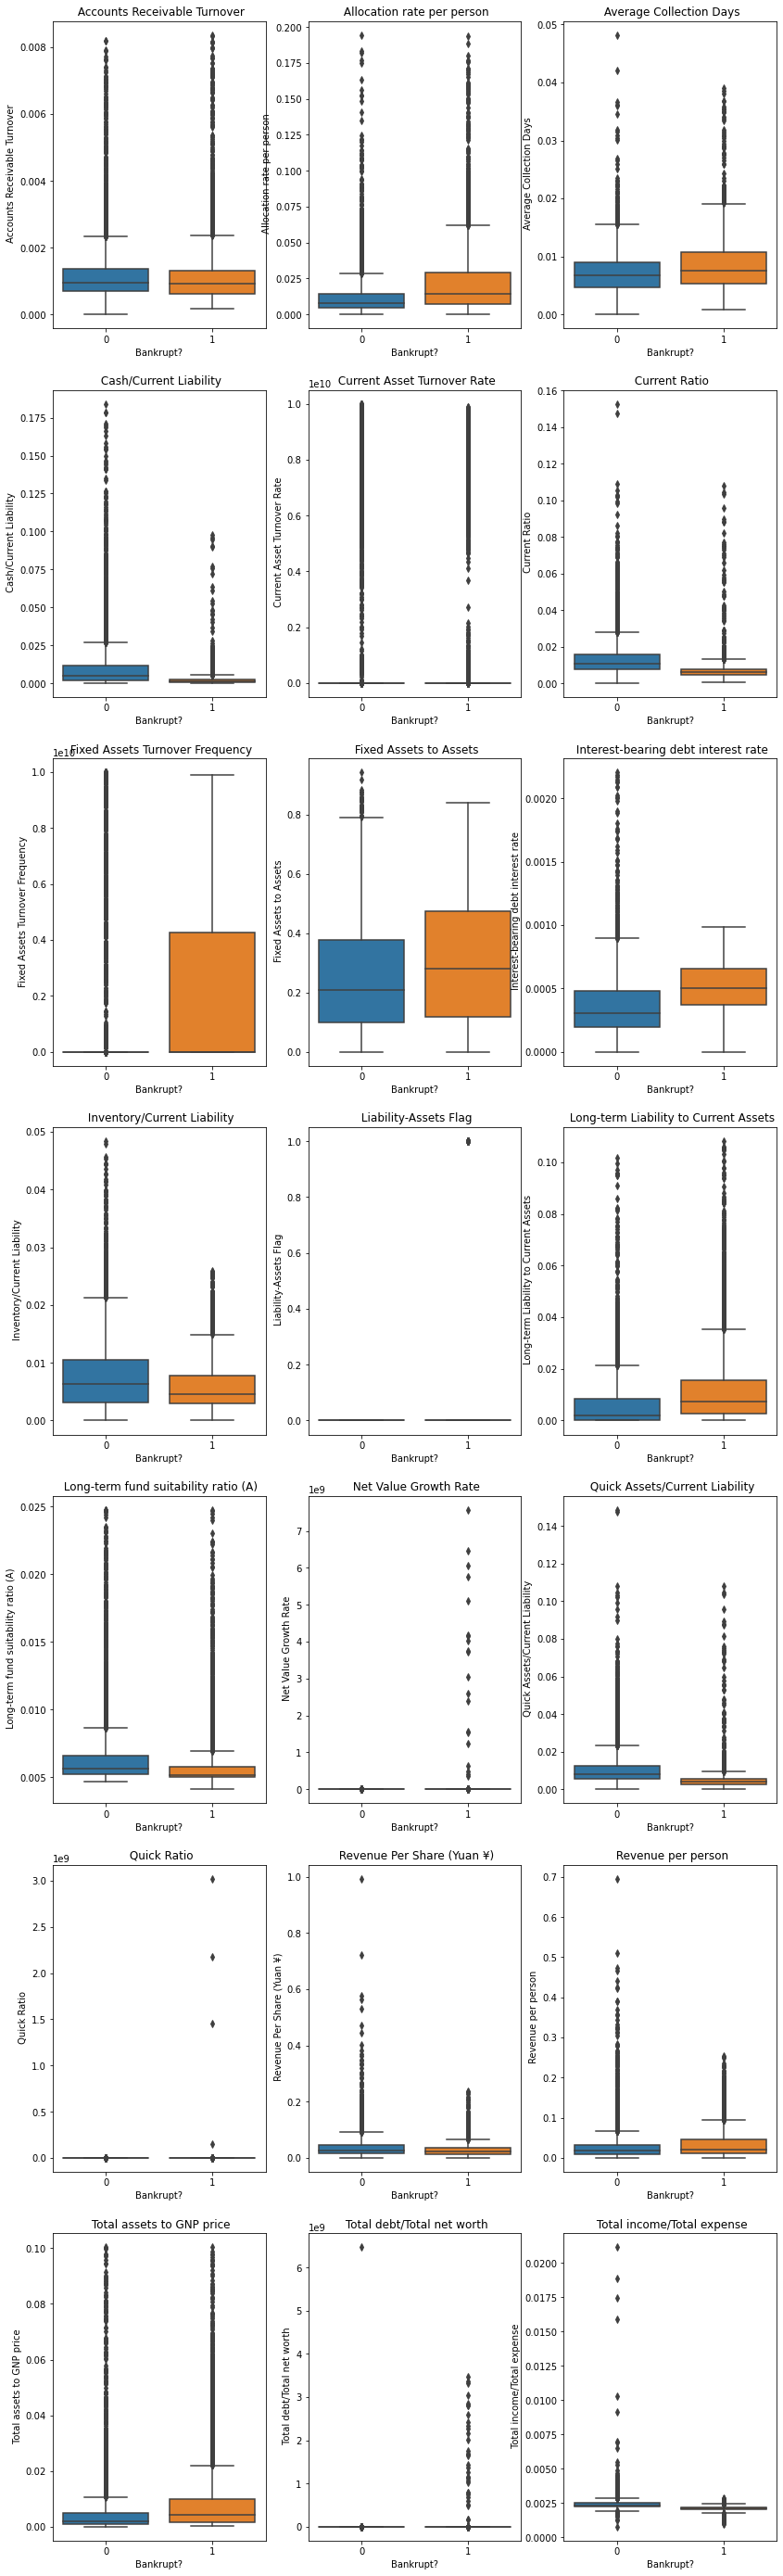

In [22]:
fig = plt.figure(figsize=(14,50))
location = 1

for i in features:
    fig.add_subplot(7,3,location)
    sns.boxplot(y=i,x='Bankrupt?',data=new_df)
    plt.title(i)
    location += 1

plt.show()

## 3.3 Normalization

In [23]:
y = new_df['Bankrupt?']
X = new_df.drop(['Bankrupt?'],axis = 1)

In [24]:
from sklearn import preprocessing
X_normal = X.apply(lambda x:preprocessing.scale(x))
X_normal

Accounts Receivable Turnover   Allocation rate per person  \
0                           0.660970                     0.905174   
1                           0.102505                    -0.248222   
3                           0.822066                     0.169647   
4                           0.274340                     0.293739   
5                           0.358110                     0.704889   
...                              ...                          ...   
13191                       0.637280                     0.068725   
13192                      -0.699643                    -0.516104   
13194                      -0.267214                    -0.487099   
13196                       1.215748                    -0.036768   
13197                       1.902396                     1.697567   

        Average Collection Days   Cash/Current Liability  \
0                     -1.052946                -0.466513   
1                     -0.696967                -0.381529   
3                     -1.120783                -0.407182   
4                     -0.833915                -0.429874   
5                     -0.891118                -0.469707   
...                         ...                      ...   
13191                 -0.999048                -0.415901   
13192                  1.277473                -0.424333   
13194                  0.165390                -0.233265   
13196                 -0.438532                -0.179294   
13197                 -1.270780                -0.432184   

        Current Asset Turnover Rate   Current Ratio  \
0                         -0.202240       -0.865963   
1                         -0.443219       -0.470299   
3                          2.355024       -0.662184   
4                          1.853128       -0.469642   
5                          2.310334       -0.815298   
...                             ...             ...   
13191                      2.251295       -0.687287   
13192                     -0.443219       -0.153507   
13194                     -0.443219       -0.236664   
13196                     -0.443219       -0.385470   
13197                      1.433357       -0.858321   

        Fixed Assets Turnover Frequency   Fixed Assets to Assets  \
0                             -0.512670                 0.702946   
1                             -0.266985                 0.924423   
3                              2.613924                 1.372694   
4                             -0.512670                 0.133892   
5                              2.665180                 1.591328   
...                                 ...                      ...   
13191                          2.525442                 1.587167   
13192                         -0.512670                -1.113061   
13194                         -0.512670                -0.174819   
13196                         -0.512670                -0.280413   
13197                          2.244479                 2.140257   

        Interest-bearing debt interest rate   Inventory/Current Liability  \
0                                  1.223245                     -1.024258   
1                                  0.896603                     -0.296789   
3                                  0.067432                     -0.587787   
4                                  1.059924                     -0.356245   
5                                  1.185556                     -0.354404   
...                                     ...                           ...   
13191                              0.179456                     -0.616745   
13192                              0.289208                      0.220719   
13194                             -0.050260                     -0.131261   
13196                             -0.061146                     -0.419346   
13197                              0.720262                     -0.651487   

       ...   Long-term Liability to Current Assets  \
0

In [25]:
full_data = X_normal.copy()
full_data['Bankrupt?'] = y
full_data

Accounts Receivable Turnover   Allocation rate per person  \
0                           0.660970                     0.905174   
1                           0.102505                    -0.248222   
3                           0.822066                     0.169647   
4                           0.274340                     0.293739   
5                           0.358110                     0.704889   
...                              ...                          ...   
13191                       0.637280                     0.068725   
13192                      -0.699643                    -0.516104   
13194                      -0.267214                    -0.487099   
13196                       1.215748                    -0.036768   
13197                       1.902396                     1.697567   

        Average Collection Days   Cash/Current Liability  \
0                     -1.052946                -0.466513   
1                     -0.696967                -0.381529   
3                     -1.120783                -0.407182   
4                     -0.833915                -0.429874   
5                     -0.891118                -0.469707   
...                         ...                      ...   
13191                 -0.999048                -0.415901   
13192                  1.277473                -0.424333   
13194                  0.165390                -0.233265   
13196                 -0.438532                -0.179294   
13197                 -1.270780                -0.432184   

        Current Asset Turnover Rate   Current Ratio  \
0                         -0.202240       -0.865963   
1                         -0.443219       -0.470299   
3                          2.355024       -0.662184   
4                          1.853128       -0.469642   
5                          2.310334       -0.815298   
...                             ...             ...   
13191                      2.251295       -0.687287   
13192                     -0.443219       -0.153507   
13194                     -0.443219       -0.236664   
13196                     -0.443219       -0.385470   
13197                      1.433357       -0.858321   

        Fixed Assets Turnover Frequency   Fixed Assets to Assets  \
0                             -0.512670                 0.702946   
1                             -0.266985                 0.924423   
3                              2.613924                 1.372694   
4                             -0.512670                 0.133892   
5                              2.665180                 1.591328   
...                                 ...                      ...   
13191                          2.525442                 1.587167   
13192                         -0.512670                -1.113061   
13194                         -0.512670                -0.174819   
13196                         -0.512670                -0.280413   
13197                          2.244479                 2.140257   

        Interest-bearing debt interest rate   Inventory/Current Liability  \
0                                  1.223245                     -1.024258   
1                                  0.896603                     -0.296789   
3                                  0.067432                     -0.587787   
4                                  1.059924                     -0.356245   
5                                  1.185556                     -0.354404   
...                                     ...                           ...   
13191                              0.179456                     -0.616745   
13192                              0.289208                      0.220719   
13194                             -0.050260                     -0.131261   
13196                             -0.061146                     -0.419346   
13197                              0.720262                     -0.651487   

       ...   Long-term fund suitability ratio (A)   Net

In [26]:
data_copy = full_data.copy()
y_stay = data_copy[data_copy['Bankrupt?']==0]
y_left = data_copy[data_copy['Bankrupt?']==1]

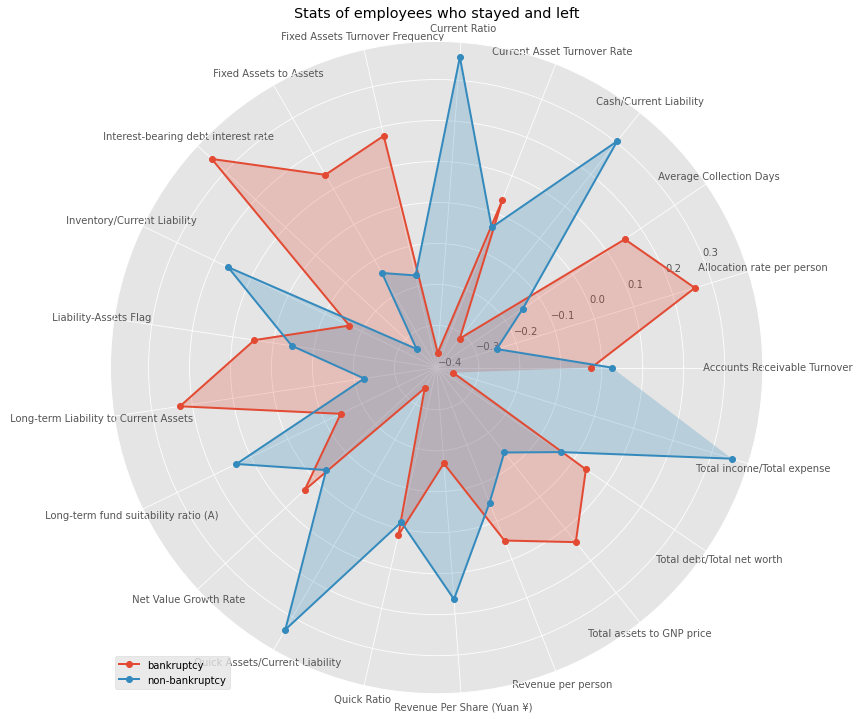

In [27]:
plt.style.use('ggplot')
y_stay_mean = y_stay[features].mean().values.reshape(1,-1)
y_left_mean = y_left[features].mean().values.reshape(1,-1)
angles=np.linspace(0, 2*np.pi,len(features), endpoint=False)
fig = plt.figure(figsize = (12,12))

ax = fig.add_subplot(111, polar=True)
ax.plot(angles, y_left_mean[0], 'o-', linewidth=2,label='bankruptcy')
ax.fill(angles, y_left_mean[0], alpha=0.25)
 
ax.plot(angles, y_stay_mean[0], 'o-', linewidth=2,label='non-bankruptcy')
ax.fill(angles, y_stay_mean[0], alpha=0.25)
 
ax.set_thetagrids(angles * 180/np.pi, features)
plt.title('Stats of employees who stayed and left')
plt.legend(loc='best')
ax.grid(True)
plt.show()


# 4 PCA VS no PCA

## 4.1 Determining Components of PCA

In [28]:
pca = PCA()
pca.fit(X_normal)
exp_var = pca.explained_variance_ratio_
print("Explained var:",exp_var)
cum_var = np.cumsum(exp_var)
print("\nCummulative var:",cum_var)

Explained var: [1.86573778e-01 1.21011432e-01 1.08096216e-01 5.97487551e-02
 5.52413982e-02 5.06075608e-02 4.81566059e-02 4.77995806e-02
 4.76434886e-02 4.12530119e-02 3.51200613e-02 3.37496554e-02
 3.26595834e-02 2.96726718e-02 2.79791530e-02 2.62435673e-02
 1.48837549e-02 1.35640145e-02 1.02614390e-02 9.73427274e-03
 7.03520720e-12]

Cummulative var: [0.18657378 0.30758521 0.41568143 0.47543018 0.53067158 0.58127914
 0.62943575 0.67723533 0.72487881 0.76613183 0.80125189 0.83500154
 0.86766113 0.8973338  0.92531295 0.95155652 0.96644027 0.98000429
 0.99026573 1.         1.        ]


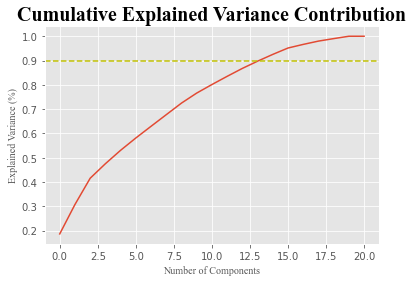

In [29]:
import matplotlib.pyplot as plt
plt.plot(np.arange(21),cum_var)
plt.axhline(y = 0.9,color = 'y',linestyle = '--')


plt.xlabel('Number of Components', fontdict = {"fontname":"Times New Roman", 'fontsize':10})
plt.ylabel('Explained Variance (%)', fontdict = {"fontname":"Times New Roman", 'fontsize':10})
plt.title('Cumulative Explained Variance Contribution', fontdict = {"fontname":"Times New Roman", 'fontsize':20, 'fontweight':'bold'})
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normal,y,random_state = 0)

In [31]:
pca = PCA(n_components = 12)
X_train_pca = pca.fit_transform(X_train)
X_train_pca = pd.DataFrame(X_train_pca)
X_train_pca

0         1         2         3         4         5         6   \
0     -0.923061 -1.853311 -0.186550 -0.692334  0.289474 -0.294005 -0.119166   
1      2.151124 -0.728346 -0.592032  0.203273  0.081661 -0.124697  0.180427   
2     -0.318803 -0.136681 -1.114909  0.722871 -0.403034  0.068395 -0.135036   
3      0.864234 -0.644860 -1.602602  0.096287  0.361468 -0.601975 -0.237686   
4      5.029138  0.385791  0.566749  0.491081  0.593693 -1.248311 -0.794817   
...         ...       ...       ...       ...       ...       ...       ...   
8363   1.754963 -0.070322 -0.351142  0.948887 -0.757284  0.662162  0.124696   
8364  10.410365 -3.200771  7.224342 -1.302902  0.961530 -0.715140 -0.198280   
8365  -3.249670  1.151374  3.463268  1.869075 -0.793214  0.128847  0.434639   
8366  -0.599300  1.425626 -0.366154 -1.648987  0.564248  0.216783 -0.207527   
8367  -3.256383 -1.891368  1.256856 -0.491998  0.579568 -0.874155 -0.165233   

            7         8         9         10        11  
0     0.106651 -0.479286  0.554304 -0.193158 -1.099649  
1     0.296304 -0.146308 -0.085184 -1.080876 -0.014049  
2    -0.268169  0.254580 -0.190141  0.451699  0.469470  
3     0.518078 -0.464308  0.388477 -0.321507  0.454646  
4     2.006230 -0.360264 -2.588730 -0.412832 -2.520189  
...        ...       ...       ...       ...       ...  
8363 -0.266392  0.397950  0.323878  0.592838  0.471199  
8364  1.209390 -0.506702 -2.937715  2.100049 -1.031707  
8365 -0.298980  0.033691  0.377827 -0.442038  0.710527  
8366 -0.244538  0.023593 -1.229518 -0.132680  0.674294  
8367  1.266042 -0.757683 -0.416287 -0.790201  0.796917  

[8368 rows x 12 columns]

In [32]:
pca = PCA(n_components = 12)
X_test_pca = pca.fit_transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca)
X_test_pca

0         1         2         3         4         5         6   \
0     0.099922 -0.014232 -1.863794  0.310029 -0.160800  0.149366  0.261187   
1    -0.515336 -0.344009  0.017986  0.155274  0.284958 -0.548414 -0.459507   
2     0.018911 -3.052579  2.408713  0.264260 -0.930571 -0.585657  1.344748   
3    -2.604260  0.362250  2.180210 -0.716361  0.296557  1.328614 -2.480439   
4    -2.974154  1.919898  0.767833 -0.276013 -0.714138  0.442870  0.612614   
...        ...       ...       ...       ...       ...       ...       ...   
2785 -3.230140  2.648836  0.836699 -0.071651 -0.149243 -0.327285  1.220837   
2786 -0.502764 -2.108545  0.356884  1.262290  0.349784  0.462480 -0.956774   
2787 -2.424697  1.062488  0.144054  0.057583 -0.491365  0.050468  0.032405   
2788 -0.179248 -0.665298 -0.223480  0.022680 -0.180071  0.424282 -0.130448   
2789 -0.045396  0.128963 -1.823649  0.352133  0.115154  0.352771 -0.160615   

            7         8         9         10        11  
0    -0.261525  0.330074  0.000144  0.132488  0.324058  
1    -0.065342  0.337997 -1.179896  0.645658  0.385873  
2    -0.537783  1.484187  1.211516  0.645959 -0.232789  
3     0.394549 -0.512373 -0.061708  0.556548 -0.438574  
4     0.296720 -0.564674  0.753592  0.381346 -0.887321  
...        ...       ...       ...       ...       ...  
2785  0.830123 -1.019219 -0.070697  1.290970  1.763001  
2786 -0.016656 -0.616877  0.488740 -0.246277  0.542613  
2787 -0.116398  0.021640  0.319545 -0.103994 -0.512542  
2788 -0.117693  0.463242  0.238275  0.700186  0.192738  
2789 -0.005914  0.059524 -0.200440  0.616991  0.270544  

[2790 rows x 12 columns]

## 4.2 Model Evaluation Before PCA

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [34]:
original_models = {
    "                         Decision Tree": DecisionTreeClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                          Naives-bayes": GaussianNB(),
    "                                   SVM": svm.SVC(),
    "                   Logistic Regression": LogisticRegression(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                        Neural Network": MLPClassifier()
}

for name, model in original_models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                         Decision Tree trained.
                         Random Forest trained.
                   K-Nearest Neighbors trained.
                          Naives-bayes trained.
                                   SVM trained.
                   Logistic Regression trained.
                     Gradient Boosting trained.
                        Neural Network trained.


In [35]:
original_results = []

for name, model in original_models.items():
    result = model.score(X_test, y_test)
    original_results.append(result)
    print(name + ": {:.2f}%".format(result * 100))

                         Decision Tree: 92.51%
                         Random Forest: 96.77%
                   K-Nearest Neighbors: 92.94%
                          Naives-bayes: 50.36%
                                   SVM: 92.29%
                   Logistic Regression: 85.84%
                     Gradient Boosting: 92.40%
                        Neural Network: 97.67%


## 4.3 Model Evaluation After PCA

In [36]:
reduced_models = {
    "                         Decision Tree": DecisionTreeClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                          Naives-bayes": GaussianNB(),
    "                                   SVM": svm.SVC(),
    "                   Logistic Regression": LogisticRegression(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                        Neural Network": MLPClassifier()
}

for name, model in reduced_models.items():
    model.fit(X_train_pca, y_train)
    print(name + " trained.")

                         Decision Tree trained.
                         Random Forest trained.
                   K-Nearest Neighbors trained.
                          Naives-bayes trained.
                                   SVM trained.
                   Logistic Regression trained.
                     Gradient Boosting trained.
                        Neural Network trained.


In [37]:
reduced_results = []

for name, model in reduced_models.items():
    result = model.score(X_test_pca, y_test)
    reduced_results.append(result)
    print(name + ": {:.2f}%".format(result * 100))

                         Decision Tree: 57.31%
                         Random Forest: 62.01%
                   K-Nearest Neighbors: 65.27%
                          Naives-bayes: 54.87%
                                   SVM: 66.27%
                   Logistic Regression: 66.70%
                     Gradient Boosting: 63.05%
                        Neural Network: 64.80%


In [38]:
import plotly.express as px
fig = px.bar(
    x=np.subtract(reduced_results, original_results),
    y=original_models.keys(),
    orientation='h',
    labels={'x': "Change in Performance", 'y': "Model"},
    color=np.subtract(reduced_results, original_results),
    color_continuous_scale=[(0, 'red'), (1, 'blue')],
    title="Change in Model Performance After Dimensionality Reduction"
)

fig.show()

we can see from graph above that model before PCA performes better,so we train model without PCA preprocess in the following part.

# 5 Modeling and Evaluation

## 5.1 Decision Tree

### 5.1.1 Finding Suitable Parameter

In [39]:
from sklearn.model_selection import GridSearchCV

depth = {'max_depth':np.arange(2,20)}
tree = DecisionTreeClassifier()
gsc = GridSearchCV(tree,depth,cv = 5)
gsc.fit(X, y)
print('the best max_depth parameter:',gsc.best_params_)
print('the best score:', gsc.best_score_)

the best max_depth parameter: {'max_depth': 18}
the best score: 0.9403145880224726


### 5.1.2 Feature Importance

In [40]:
tree_new = DecisionTreeClassifier(max_depth = 18)
feat_labels = X.columns
tree_new.fit(X,y)
importance = tree_new.feature_importances_
feature_importance = pd.DataFrame()
feature_importance['feature'] = X.columns
feature_importance['importance'] = importance
feature_importance.set_index('feature')
feature_importance = feature_importance.sort_values(['importance'],ascending = False)
feature_importance.set_index(['feature'])

importance
feature                                           
 Total income/Total expense               0.441139
 Total debt/Total net worth               0.157993
 Quick Ratio                              0.077972
 Average Collection Days                  0.047917
 Interest-bearing debt interest rate      0.041890
 Allocation rate per person               0.027712
 Total assets to GNP price                0.027596
 Revenue per person                       0.024303
 Long-term Liability to Current Assets    0.019025
 Fixed Assets Turnover Frequency          0.018140
 Current Ratio                            0.016272
 Cash/Current Liability                   0.015910
 Revenue Per Share (Yuan ¥)               0.014284
 Long-term fund suitability ratio (A)     0.014156
 Net Value Growth Rate                    0.013615
 Current Asset Turnover Rate              0.012073
 Accounts Receivable Turnover             0.010449
 Inventory/Current Liability              0.007855
 Quick Assets/Current Liability           0.006409
 Fixed Assets to Assets                   0.005291
 Liability-Assets Flag                    0.000000

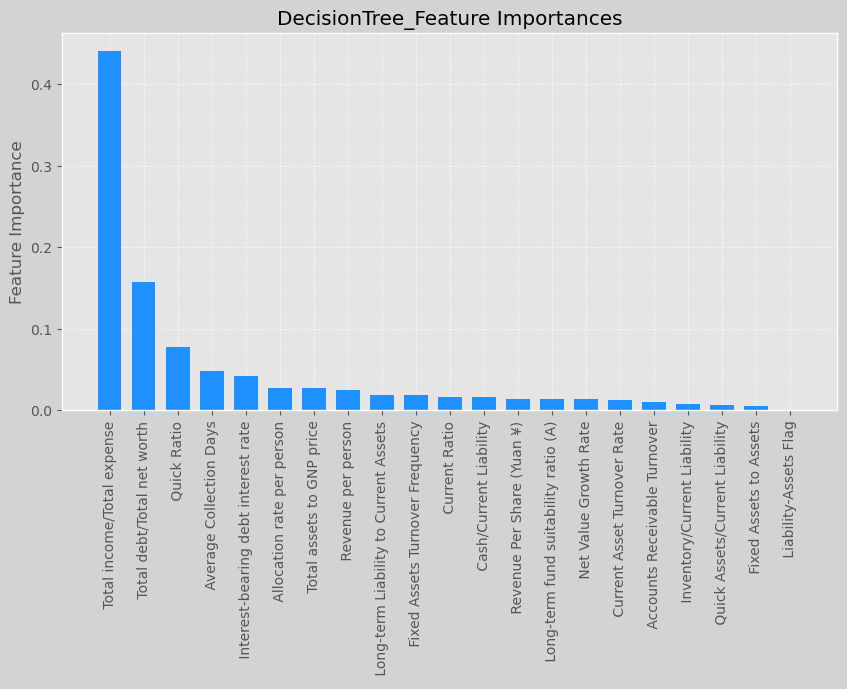

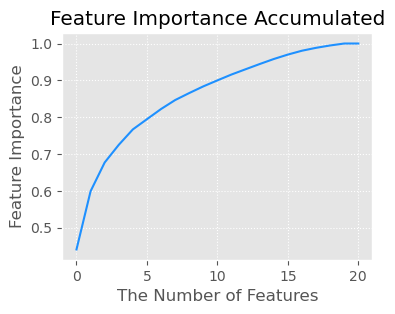

In [41]:
import matplotlib.pyplot as plt
plt.figure('Feature Importance', facecolor='lightgray', figsize = (10,5),dpi = 100)
plt.title('DecisionTree_Feature Importances')
plt.ylabel('Feature Importance')
plt.grid(linestyle=":")
t3 = np.arange(feat_labels.size)
plt.bar(t3, feature_importance['importance'], 0.7, color='dodgerblue')
plt.xticks(t3, feature_importance['feature'],rotation = 90) 

cum = np.cumsum(feature_importance['importance'])
plt.figure('Feature Importance Accumulated', figsize = (4,3),dpi = 100)
plt.title('Feature Importance Accumulated')
plt.ylabel('Feature Importance')
plt.xlabel('The Number of Features')
plt.grid(linestyle=":")
plt.plot(t3, cum, 0.7, color='dodgerblue')
plt.show()

## 5.2 RandomForest

### 5.2.1 Finding Suitable Parameters

In [42]:

rfc = RandomForestClassifier()
parameters = {'n_estimators':[37,36,38,39,40,41],'max_depth':[18,19,20,21,22,23]}
gscrf = GridSearchCV(rfc,parameters,cv = 5)
gscrf.fit(X,y)
print('the best parameter:',gscrf.best_params_)
print('the best score:', gscrf.best_score_)

the best parameter: {'max_depth': 21, 'n_estimators': 40}
the best score: 0.9689029542982638


### 5.2.2  Feature Importance

In [43]:
rfc_new = RandomForestClassifier(n_estimators=36,max_depth = 22,random_state = 0)
feat_labels = X.columns
rfc_new.fit(X,y)
importance = rfc_new.feature_importances_
feature_importance = pd.DataFrame()
feature_importance['feature'] = X.columns
feature_importance['importance'] = importance
feature_importance.set_index('feature')
feature_importance = feature_importance.sort_values(['importance'],ascending = False)
feature_importance.set_index(['feature'])

importance
feature                                           
 Total income/Total expense               0.170345
 Total debt/Total net worth               0.142102
 Net Value Growth Rate                    0.100713
 Quick Ratio                              0.098431
 Current Ratio                            0.060310
 Interest-bearing debt interest rate      0.053653
 Average Collection Days                  0.036117
 Long-term Liability to Current Assets    0.036017
 Quick Assets/Current Liability           0.034301
 Allocation rate per person               0.032925
 Cash/Current Liability                   0.032648
 Long-term fund suitability ratio (A)     0.025771
 Current Asset Turnover Rate              0.025301
 Fixed Assets Turnover Frequency          0.025101
 Revenue per person                       0.023925
 Total assets to GNP price                0.022912
 Revenue Per Share (Yuan ¥)               0.022384
 Fixed Assets to Assets                   0.020884
 Accounts Receivable Turnover             0.020217
 Inventory/Current Liability              0.015867
 Liability-Assets Flag                    0.000077

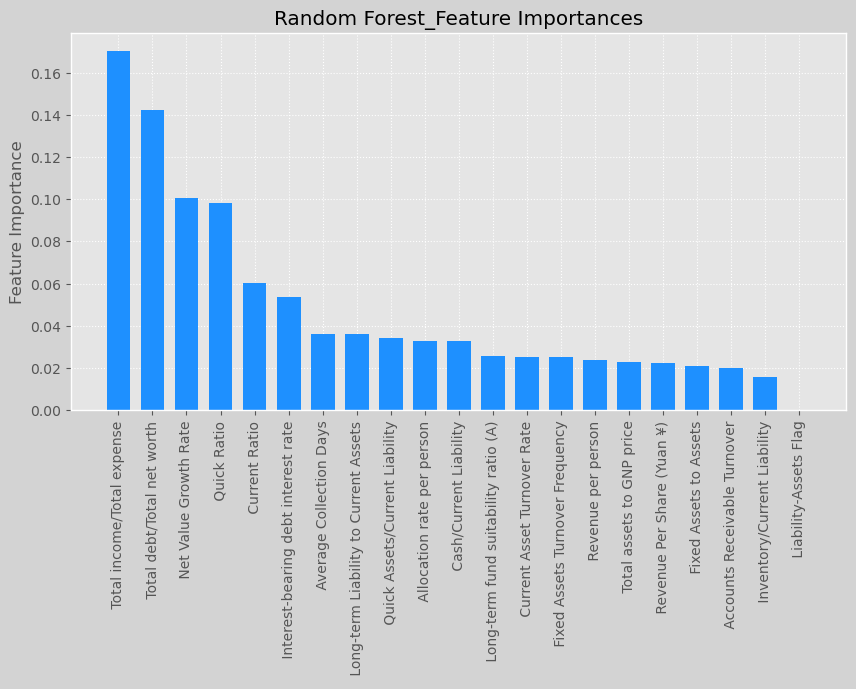

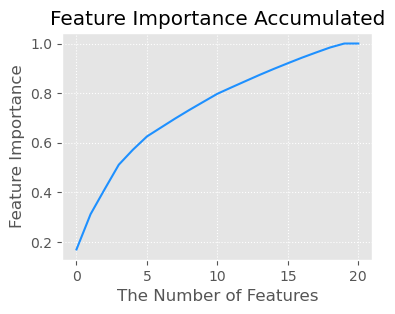

In [44]:
# Plotting the feature importances
import matplotlib.pyplot as plt
plt.figure('Feature Importance', facecolor='lightgray', figsize = (10,5),dpi = 100)
plt.title('Random Forest_Feature Importances')
plt.ylabel('Feature Importance')
plt.grid(linestyle=":")
t3 = np.arange(feat_labels.size)
plt.bar(t3, feature_importance['importance'], 0.7, color='dodgerblue')
plt.xticks(t3, feature_importance['feature'],rotation = 90) 

cum = np.cumsum(feature_importance['importance'])
plt.figure('Feature Importance Accumulated', figsize = (4,3),dpi = 100)
plt.title('Feature Importance Accumulated')
plt.ylabel('Feature Importance')
plt.xlabel('The Number of Features')
plt.grid(linestyle=":")
plt.plot(t3, cum, 0.7, color='dodgerblue')
plt.show()

## 5.3 KNN

## 5.3.1 Finding Suitable Parameters

In [45]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
parameters_knn = {'n_neighbors':[1,2,3,4,5],'weights':['uniform','distance']}
grid_knn = GridSearchCV(knn,parameters_knn,cv=5)
grid_knn.fit(X_normal,y)
print('the best parameter is:',grid_knn.best_params_)
print('the best score:', grid_knn.best_score_)

the best parameter is: {'n_neighbors': 2, 'weights': 'uniform'}
the best score: 0.9474844123775602


## 5.4 Naives Bayes

In [46]:
from sklearn.model_selection import cross_val_score

nb = GaussianNB()
scores_nb = cross_val_score(nb,X,y,cv=5)
print("The mean score is ",scores_nb.mean())

The mean score is  0.5118302864973677


## 5.5 SVM

### 5.5.1 Finding Suitable Parameters

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [48]:
svm_model = svm.SVC()
svmparameter = {'C':[0.1,0.5,1,1.5,2,3],'tol':[0.03,0.04,0.05,0.06]}

grid_svm=GridSearchCV(svm_model,param_grid=svmparameter,cv=5)
grid_svm.fit(X_normal,y)  
print('the best parameter is:',grid_svm.best_params_)
print('the best score:', grid_svm.best_score_)

the best parameter is: {'C': 3, 'tol': 0.06}
the best score: 0.9261549138965602


## 5.6 Logistic Regression

### 5.6.1 Finding Suitable Parameters

In [49]:
lr=LogisticRegression(max_iter=1000)
lr_param = {'C':[0.01,0.05,0.1], 'tol':[0.0001,0.001,0.01]}

grid_lr=GridSearchCV(lr,param_grid=lr_param,cv=5)
grid_lr.fit(X,y)
print('the best parameter is:',grid_lr.best_params_)
print('the best score:', grid_lr.best_score_)

the best parameter is: {'C': 0.01, 'tol': 0.0001}
the best score: 0.48592908816625935


## 5.7 GradientBoostingDecisionTree

### 5.7.1  Finding Suitable Parameters

In [50]:
gbdt_param = {'max_depth':[16,17,18],'min_samples_split':[200,210,220]}
model_gradient = GradientBoostingClassifier()
grid_gradient = GridSearchCV(model_gradient,gbdt_param,cv = 5)
grid_gradient.fit(X_normal,y)
print('the best parameter is:',grid_gradient.best_params_)
print('the best score:', grid_gradient.best_score_)

the best parameter is: {'max_depth': 17, 'min_samples_split': 200}
the best score: 0.9623609725455419


### 5.7.2  Feature Importance

In [51]:
model_gradient_new = GradientBoostingClassifier(max_depth=17,min_samples_split = 210)
feat_labels = X.columns
model_gradient_new.fit(X,y)
importance = model_gradient_new.feature_importances_
feature_importance = pd.DataFrame()
feature_importance['feature'] = X.columns
feature_importance['importance'] = importance
feature_importance.set_index('feature')
feature_importance = feature_importance.sort_values(['importance'],ascending = False)
feature_importance.set_index(['feature'])

importance
feature                                             
 Total income/Total expense             3.455333e-01
 Total debt/Total net worth             2.727681e-01
 Quick Ratio                            5.233018e-02
 Average Collection Days                5.086298e-02
 Interest-bearing debt interest rate    4.720710e-02
 Revenue Per Share (Yuan ¥)             2.801534e-02
 Allocation rate per person             2.689127e-02
 Total assets to GNP price              2.436190e-02
 Long-term Liability to Current Assets  1.996961e-02
 Fixed Assets Turnover Frequency        1.936301e-02
 Net Value Growth Rate                  1.687648e-02
 Current Asset Turnover Rate            1.366934e-02
 Revenue per person                     1.358829e-02
 Fixed Assets to Assets                 1.295351e-02
 Inventory/Current Liability            1.198445e-02
 Long-term fund suitability ratio (A)   1.142355e-02
 Cash/Current Liability                 1.134321e-02
 Quick Assets/Current Liability         7.576905e-03
 Current Ratio                          6.995074e-03
 Accounts Receivable Turnover           6.286261e-03
 Liability-Assets Flag                  1.850156e-07

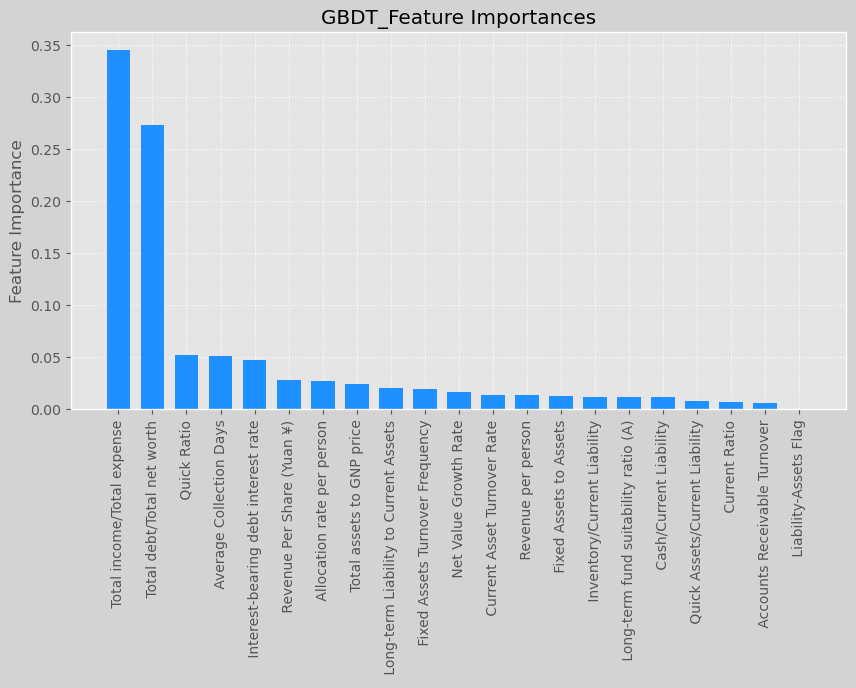

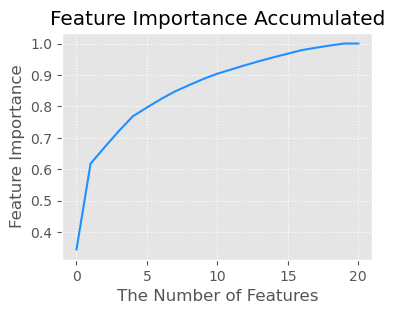

In [52]:
# Plotting the feature importances
import matplotlib.pyplot as plt
plt.figure('Feature Importance', facecolor='lightgray', figsize = (10,5),dpi = 100)
plt.title('GBDT_Feature Importances')
plt.ylabel('Feature Importance')
plt.grid(linestyle=":")
t3 = np.arange(feat_labels.size)
plt.bar(t3, feature_importance['importance'], 0.7, color='dodgerblue')
plt.xticks(t3, feature_importance['feature'],rotation = 90) 

cum = np.cumsum(feature_importance['importance'])
plt.figure('Feature Importance Accumulated', figsize = (4,3),dpi = 100)
plt.title('Feature Importance Accumulated')
plt.ylabel('Feature Importance')
plt.xlabel('The Number of Features')
plt.grid(linestyle=":")
plt.plot(t3, cum, 0.7, color='dodgerblue')
plt.show()

## 5.8 ROC curve

In [53]:
models = dict()
models['Decision Tree'] = DecisionTreeClassifier(max_depth = 18)
models['Random Forest'] = RandomForestClassifier(n_estimators=36,max_depth = 22,random_state = 0)
models['KNN'] =KNeighborsClassifier(n_neighbors = 2,weights = 'uniform')
models['Naive Bayes'] = GaussianNB()
models['SVM'] = svm.SVC(C = 3, tol = 0.04)
models['LogisticRegression'] = LogisticRegression(C=0.01, tol=0.0001)
models['GradientBoost'] = GradientBoostingClassifier(max_depth=17,min_samples_split = 210)

In [54]:
for model in models:
    models[model].fit(X_train, y_train)
    print(model + ' : fit')

Decision Tree : fit
Random Forest : fit
KNN : fit
Naive Bayes : fit
SVM : fit
LogisticRegression : fit
GradientBoost : fit


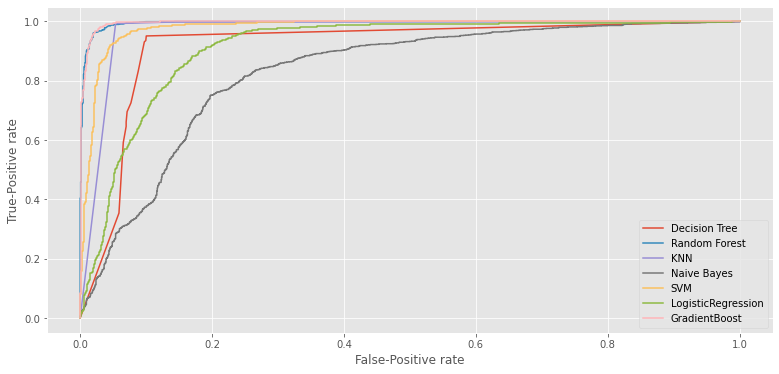

In [55]:
from sklearn.metrics import roc_curve

fig, ax = plt.subplots()
fig.set_size_inches(13,6)

for m in models:
    if m == 'SVM':
        y_pred = models[m].decision_function(X_test)
        fpr,tpr,threshold = roc_curve(y_test, y_pred)
        plt.plot(fpr,tpr, label=m)
    else:
        y_pred = models[m].predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_pred[:,1].ravel())
        plt.plot(fpr,tpr, label=m)
plt.xlabel('False-Positive rate')
plt.ylabel('True-Positive rate')
plt.legend()
plt.show()

# 6. Hypothesis Testing for Model Results

## 6.1 GradientBoostingDecisionTree

In [56]:
from sklearn.model_selection import cross_val_score
gradientboost_new = GradientBoostingClassifier(max_depth = 16,min_samples_split=200)
CV_score = cross_val_score(gradientboost_new,X_smote, y_smote,cv=10)
print("The cross-validation score is ",CV_score)
print("The mean score is ",CV_score.mean())

The cross-validation score is  [0.96363636 0.95984848 0.95606061 0.95757576 0.97954545 0.98939394
 0.98863636 0.98257576 0.9909022  0.9833207 ]
The mean score is  0.9751495623406162


## 6.2 Random Forest

In [57]:
rfc_new = RandomForestClassifier(max_depth = 17, n_estimators = 42)
CV_score_2 = cross_val_score(rfc_new,X_smote, y_smote,cv=10)
print("The cross-validation score is ",CV_score_2)
print("The mean score is ",CV_score_2.mean())

The cross-validation score is  [0.95530303 0.95454545 0.95757576 0.95833333 0.97727273 0.98863636
 0.98560606 0.97348485 0.9863533  0.9742229 ]
The mean score is  0.9711333769844005


## 6.3 Hypothesis Test

In [58]:
from scipy import stats

In [59]:
score_diff = CV_score-CV_score_2
avg_diff = CV_score.mean()-CV_score_2.mean()
x = score_diff - avg_diff
x

array([ 0.00431715,  0.00128684, -0.00553134, -0.00477376, -0.00174346,
       -0.00325861, -0.00098588,  0.00507472,  0.00053272,  0.00508162])

In [60]:
# H0: GB_CV_score >= RF_CV_score; H1: GB_CV_score < RF_CV_score

In [61]:
t_value = avg_diff/(np.sqrt(np.sum(np.power(x,2))/100))
t_value

3.3922638907009612

In [62]:
# one-tail ttest
critical_t = stats.t.ppf(1-0.05,9)
critical_t

1.8331129326536335

In [63]:
if abs(t_value) > abs(critical_t):
    print('There is statistically significant difference to prove that Random Forest Model is better.')
else:
    print('No evidence to prove one is significantly better than the other.')

There is statistically significant difference to prove that Random Forest Model is better.
